# Pandas to read CSV data

Let's see Pandas in action, to understand some of its power and utility...

## If we just want the first 6 rows, just use readline()

We know there are 6 header lines, we can get those using Python's `open()` and `f.readline()`:

In [7]:
# Set the path and read metadata
fpath = "../example_data/uk_rainfall.txt"
with open(fpath) as f:
    metadata = [f.readline().strip() for i in range(6)]
    
for item in metadata:
    print("Item:", item)

Item: UK Rainfall (mm)
Item: Areal series, starting from 1910
Item: Allowances have been made for topographic, coastal and urban effects where relationships are found to exist.
Item: Seasons: Winter=Dec-Feb, Spring=Mar-May, Summer=June-Aug, Autumn=Sept-Nov. (Winter: Year refers to Jan/Feb).
Item: Values are ranked and displayed to 1 dp. Where values are equal, rankings are based in order of year descending.
Item: Data are provisional from December 2014 & Winter 2015. Last updated 07/04/2015


## Now let's see what Pandas can do to read the actual tabular data

Pandas can read many formats, and stores data very efficiently. In this case we use:

`pandas.read_csv()`

See docs: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In one call, we tell it to:
- read from file `fpath`
- skip the first 6 rows of the header (captured above)
- use a regular expression to split the fields (i.e. `"\s+"` which means split on white space
- use the first column (Year) as the index
- values specified as `"---"` should be treated as missing values

In [8]:
# Read it in one line with Pandas!

import pandas as pd
df = pd.read_csv(fpath, skiprows=6, sep="\s+",
			 index_col=0, na_values="---")

View the data as the DataFrame `df`:

In [10]:
df

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,WIN,SPR,SUM,AUT,ANN
Year,,,,,,,,,,,,,,,,,
1910,111.4,126.1,49.9,95.3,71.8,70.2,97.1,140.2,27.0,89.4,128.4,142.2,NaN,217.0,307.5,244.8,1148.9
1911,59.2,99.7,62.1,69.0,52.2,77.0,43.3,69.3,69.4,91.5,141.3,188.4,301.0,183.4,189.6,302.2,1022.4
1912,111.7,79.5,128.2,36.1,58.2,124.5,92.3,167.6,57.1,116.2,106.9,163.7,379.6,222.5,384.4,280.3,1242.0
1913,123.4,57.1,131.2,102.9,81.5,63.8,33.7,44.5,73.7,103.0,125.9,86.6,344.2,315.6,142.1,302.6,1027.4
1914,78.8,114.9,124.3,52.3,59.6,52.5,94.4,80.1,57.2,61.8,139.3,203.3,280.3,236.3,227.0,258.3,1118.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,79.7,74.8,79.4,48.0,39.0,38.6,107.6,97.6,114.0,101.1,123.2,47.5,255.4,166.4,243.8,338.3,950.5
2011,102.8,114.5,49.7,36.7,101.8,85.1,76.1,105.8,108.5,122.8,100.6,168.1,264.9,188.2,266.9,331.9,1172.5
2012,110.9,60.0,37.0,128.0,65.8,149.0,118.9,111.3,112.9,126.2,135.5,179.4,339.0,230.8,379.2,374.6,1334.8


Use some of the built-in Pandas DataFrame functions:

In [11]:
# Get the column names as a list
df.columns.tolist()

['JAN',
 'FEB',
 'MAR',
 'APR',
 'MAY',
 'JUN',
 'JUL',
 'AUG',
 'SEP',
 'OCT',
 'NOV',
 'DEC',
 'WIN',
 'SPR',
 'SUM',
 'AUT',
 'ANN']

In [12]:
# Find out which field is the index
df.index.name

'Year'

In [13]:
# Show the spread of each column
df.describe()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,WIN,SPR,SUM,AUT,ANN
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,104.000000,105.000000,105.000000,105.000000,105.000000
mean,113.308571,83.387619,78.653333,68.535238,69.384762,69.096190,82.012381,92.477143,91.883810,113.569524,114.699048,118.287619,314.483654,216.570476,243.580000,320.153333,1095.295238
std,35.856737,37.533935,28.333967,23.734225,24.055080,26.229277,27.966896,33.318357,33.724338,38.156770,38.538179,39.013116,71.437508,42.207881,56.874603,65.079506,108.620457
min,29.000000,8.800000,17.000000,14.100000,22.000000,14.200000,30.600000,10.300000,22.800000,31.600000,22.100000,32.400000,119.500000,119.800000,103.000000,193.400000,835.400000
25%,93.300000,58.000000,57.200000,50.000000,51.700000,50.400000,61.900000,73.900000,69.400000,89.400000,86.100000,88.600000,259.825000,189.400000,205.700000,268.100000,1025.600000
50%,111.400000,79.500000,75.500000,69.000000,66.400000,64.900000,78.500000,90.300000,92.000000,115.300000,112.800000,115.500000,309.450000,212.700000,240.800000,321.500000,1091.000000
75%,137.000000,106.300000,93.500000,87.200000,86.700000,86.900000,98.500000,112.900000,113.700000,142.300000,143.000000,142.200000,356.900000,237.300000,280.100000,368.500000,1177.700000
max,205.100000,187.900000,150.300000,128.000000,128.300000,149.000000,145.600000,167.600000,182.200000,194.800000,215.700000,213.000000,544.900000,331.700000,384.400000,497.800000,1337.300000


In [15]:
# Get information about the overall DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 1910 to 2014
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JAN     105 non-null    float64
 1   FEB     105 non-null    float64
 2   MAR     105 non-null    float64
 3   APR     105 non-null    float64
 4   MAY     105 non-null    float64
 5   JUN     105 non-null    float64
 6   JUL     105 non-null    float64
 7   AUG     105 non-null    float64
 8   SEP     105 non-null    float64
 9   OCT     105 non-null    float64
 10  NOV     105 non-null    float64
 11  DEC     105 non-null    float64
 12  WIN     104 non-null    float64
 13  SPR     105 non-null    float64
 14  SUM     105 non-null    float64
 15  AUT     105 non-null    float64
 16  ANN     105 non-null    float64
dtypes: float64(17)
memory usage: 14.8 KB


You can use `df.loc` to locate specific columns/rows. In this case we select WINTER in 1918.

In [17]:
df.loc[1918, "WIN"]

272.9

Whereas `df.iloc` uses the index lookups, here is the same lookup via indexes:

In [20]:
df.iloc[8, 12]

272.9

And you can slice as well as select individual values:

In [22]:
df.iloc[:4, -2:]

,AUT,ANN
Year,,
1910,244.8,1148.9
1911,302.2,1022.4
1912,280.3,1242.0
1913,302.6,1027.4


## Plotting

Plotting is easy, just call the `plot()` method on the particular DataFrame or Series you are looking at.

<AxesSubplot:title={'center':'Time-series of rainfall in March'}, xlabel='Year', ylabel='Rainfall (mm)'>

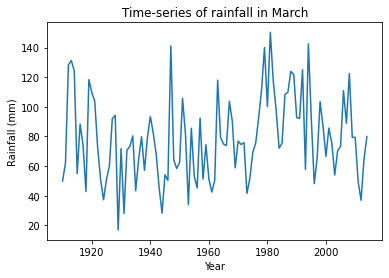

In [23]:
df.MAR.plot(title="Time-series of rainfall in March", ylabel="Rainfall (mm)")